In [2]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data      

tf.set_random_seed(0)                                           

# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 1. Define Variables and Placeholders
XX = tf.placeholder(tf.float32, [None, 784])
Y_ = tf.placeholder(tf.float32,[None,10])
pkeep = tf.placeholder(tf.float32)

global_step = tf.Variable(0, trainable=False)
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.0, shape=shape)
  return tf.Variable(initial)

W1 = weight_variable([5,5,1,4])
B1 = bias_variable([4])  
W2 = weight_variable([5,5,4,8])
B2 = bias_variable([8])
W3 = weight_variable([4,4,8,12])
B3 = bias_variable([12])  
W4 = weight_variable([7*7*12,200])
B4 = bias_variable([200])
W5 = weight_variable([200,10])
B5 = bias_variable([10])
# 2. Define the model
def s(x,w,b):
    return tf.nn.sigmoid(tf.matmul(x, w) + b)

def r(x,w,b):
    return tf.nn.relu(tf.matmul(x, w) + b)
    
x_image = tf.reshape(XX, [-1,28,28,1])
print(tf.rank(x_image))
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image,W1, strides=[1,1,1,1],padding='SAME')+B1)
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_conv1,W2, strides=[1,2,2,1],padding='SAME')+B2)
h_conv3 = tf.nn.relu(tf.nn.conv2d(h_conv2,W3, strides=[1,2,2,1],padding='SAME')+B3)
print(h_conv3)
y=tf.reshape(h_conv3,[-1,7*7*12])
yd = tf.nn.dropout(y, pkeep)
h_fc = r(yd, W4, B4)
Ylogits = tf.matmul(h_fc,W5)+B5
Y = tf.nn.softmax(Ylogits)
# 3. Define the loss function  
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits,Y_))
# 4. Define the accuracy 
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 5. Define an optimizer
learning_rate = tf.train.exponential_decay(0.005, global_step,1000, 0.96, staircase=True)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy,global_step = global_step)
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Tensor("Rank:0", shape=(), dtype=int32)
Tensor("Relu_2:0", shape=(?, 7, 7, 12), dtype=float32)


In [4]:
def training_step(i, update_test_data, update_train_data):

    #print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y, pkeep: 0.75})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y, pkeep: 1.0})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        test_a.append(a)
        test_c.append(c)
        #print(i,a,c)

    
    return (train_a, train_c, test_a, test_c)

In [5]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

In [6]:
print("Final Accuracy:" + str(test_a[-1]))
print("Final loss :" + str(test_c[-1]))


Final Accuracy:0.9861
Final loss :0.0460235


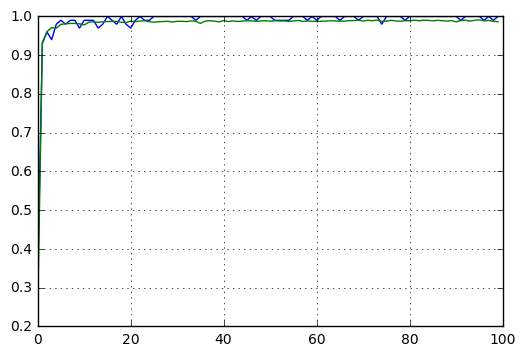

In [7]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()


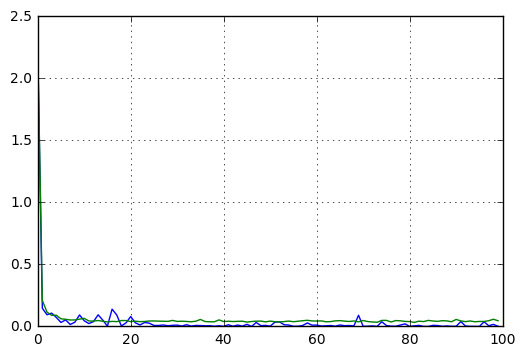

In [8]:
# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

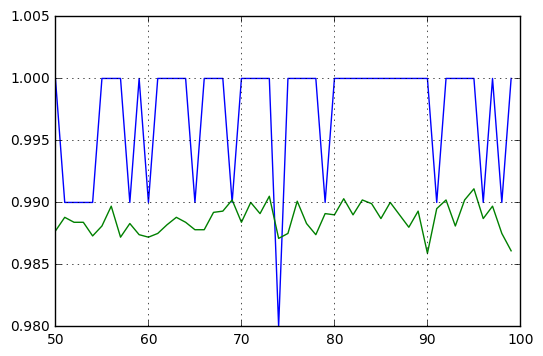

In [9]:
# Zoom in on the tail of the plots
zoom_point = 50
NoB=int(training_iter/epoch_size)
x_range = range(zoom_point,NoB)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()


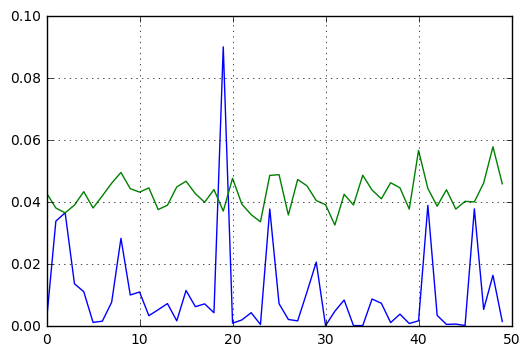

In [10]:
plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()